In [1]:
import pandas as pd
import numpy as np
import mne
import scipy as sp
from scipy.io import arff
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

E:\Programs\ProgramFiles\anaconda3\envs\edsPyR\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load data from file
eeg_data = arff.loadarff("/Users/sjw19206/7135CEM/eye-state-classification-dataset/EEG_Eye_State.arff")
# load data into dataframe
eeg_df = pd.DataFrame(eeg_data[0])
# rename column
eeg_df = eeg_df.rename(columns={"eyeDetection":"EYEST"})
# display first five rows
eeg_df.head(5)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,EYEST
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [3]:
# converting type of 'EYEST' - byte to integer
eeg_df_iv = eeg_df.drop('EYEST', axis = 1)
eeg_df_tv = eeg_df['EYEST'].astype(int)
eeg_df_upd = pd.concat([eeg_df_iv, eeg_df_tv], axis = 1)

In [4]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

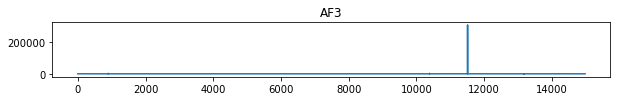

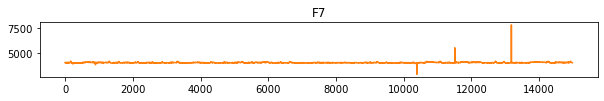

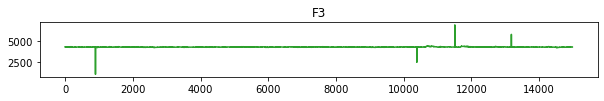

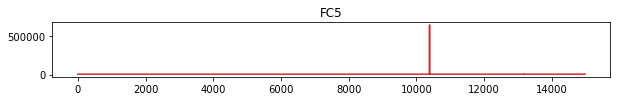

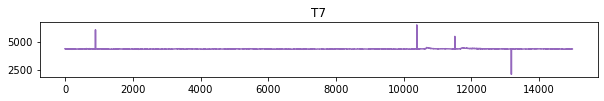

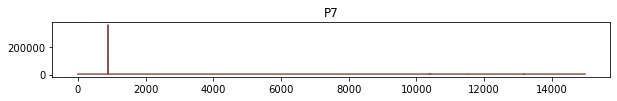

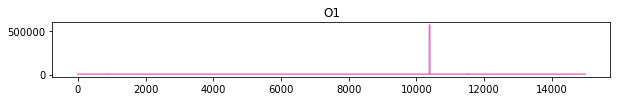

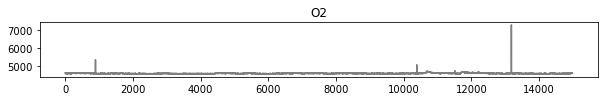

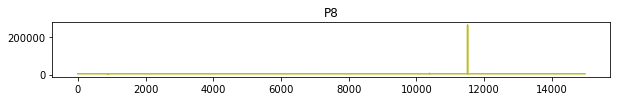

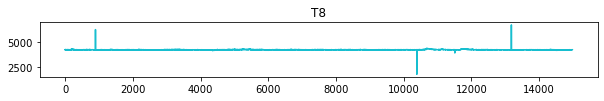

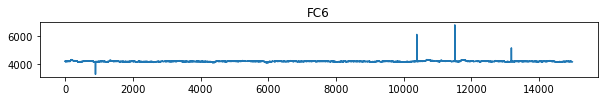

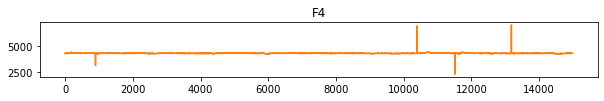

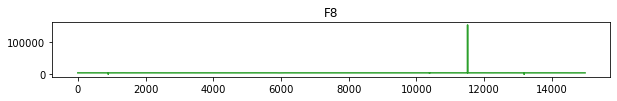

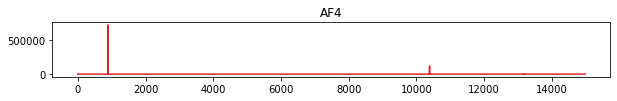

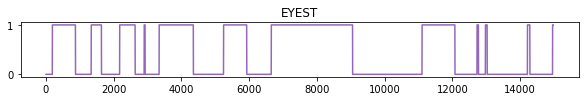

In [5]:
# Display Features
for col in eeg_df_upd.columns:
    eeg_df_upd[col].plot(figsize=(10, 1), color=next(color_cycle), title=col)
    plt.show()

In [6]:
# detect and remove outliers
z_scores = stats.zscore(eeg_df_upd)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1)
df_ro = eeg_df_upd[filtered_entries]
# reset index
df_ro = df_ro.reset_index(drop=True)
df_ro.shape

(14976, 15)

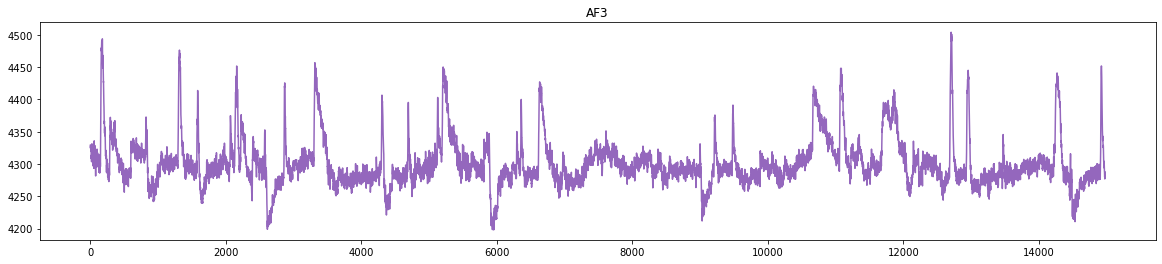

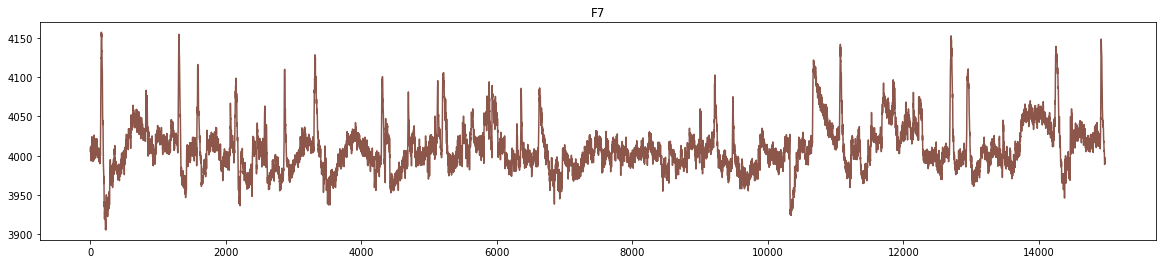

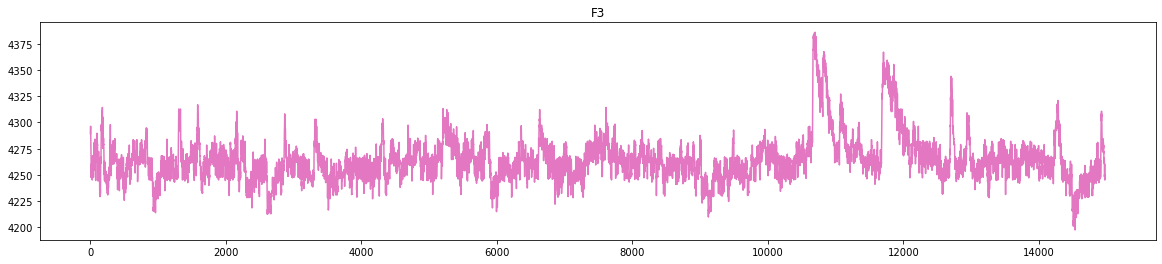

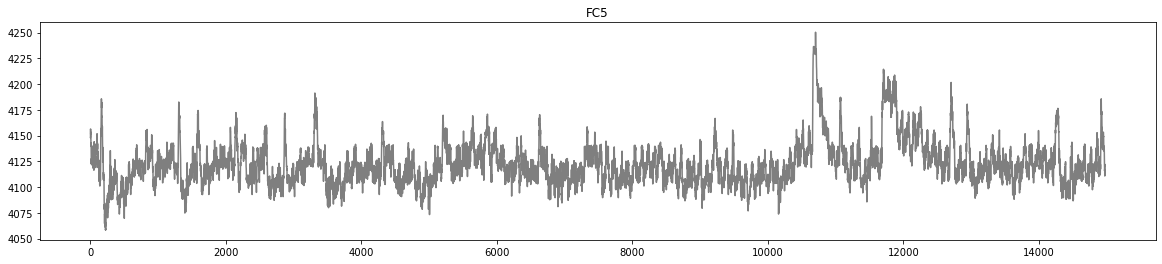

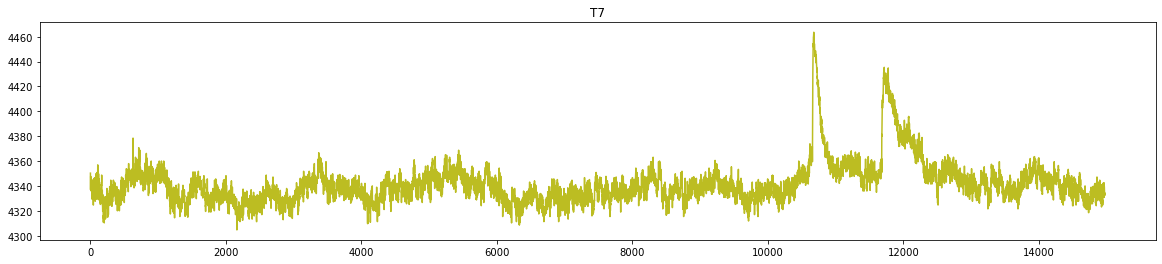

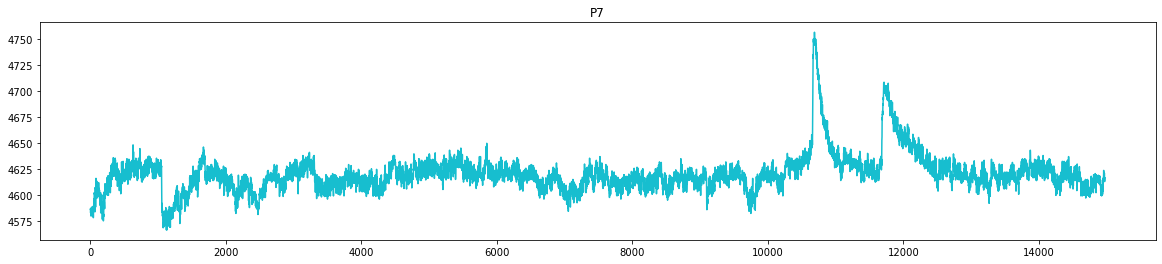

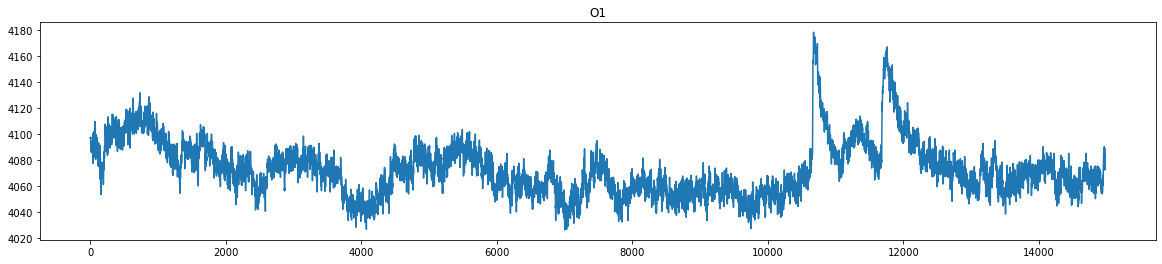

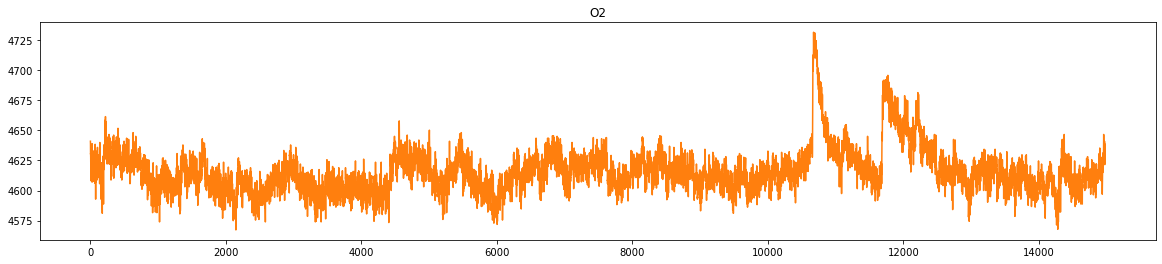

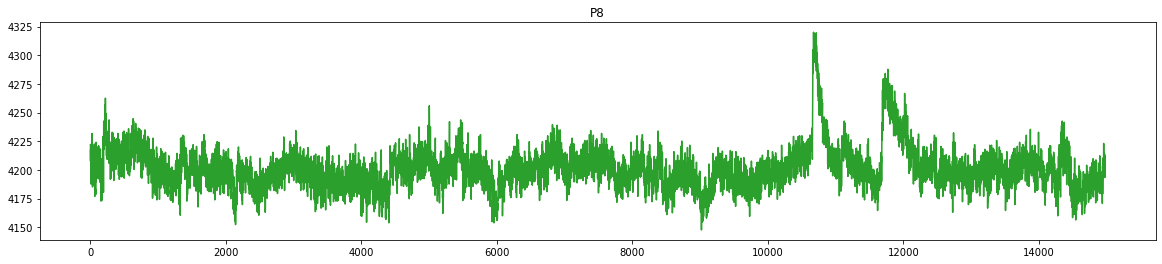

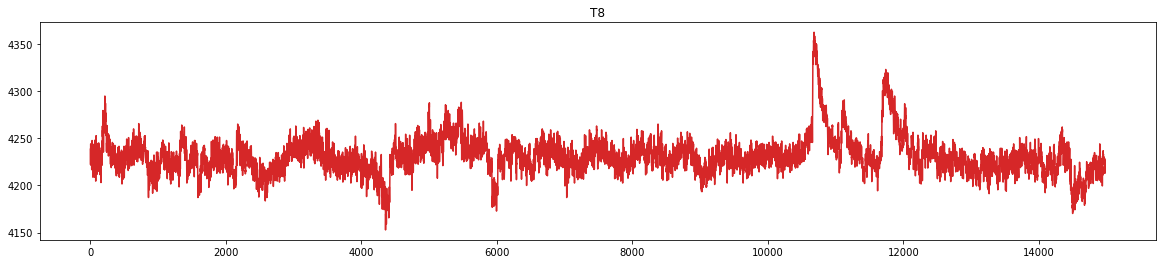

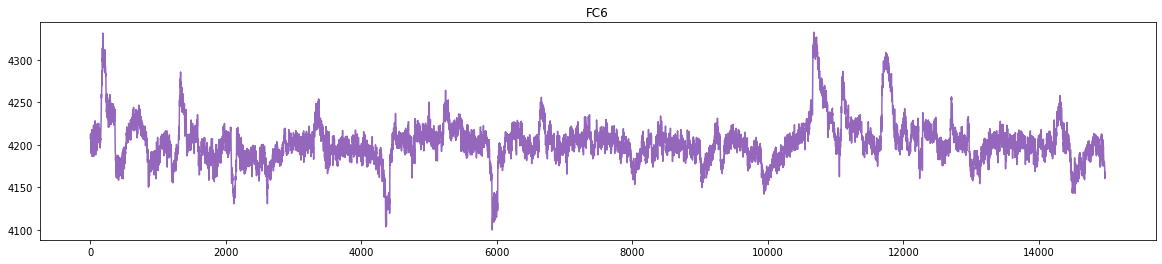

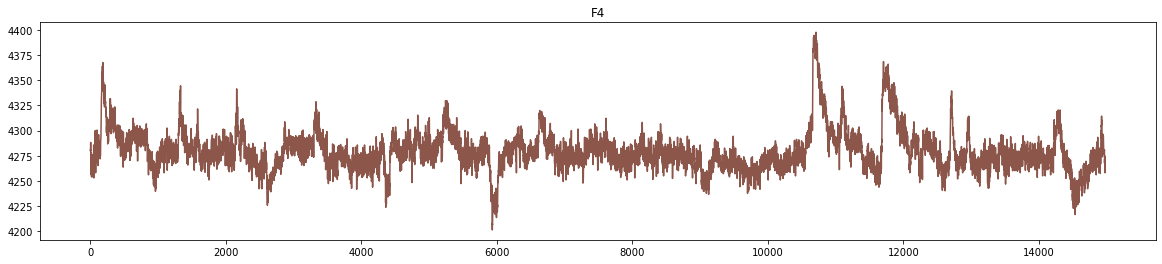

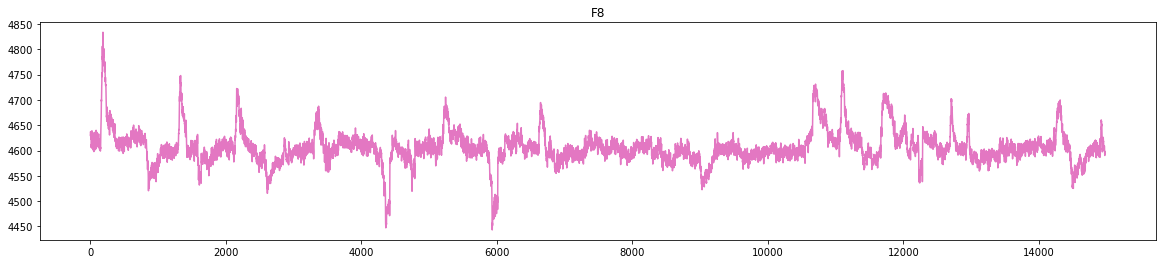

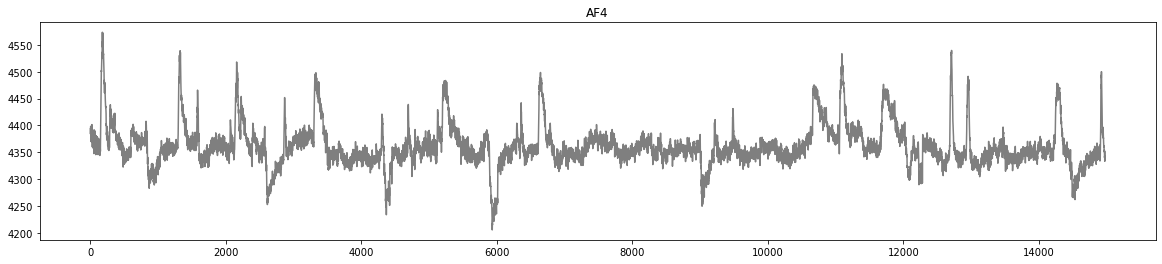

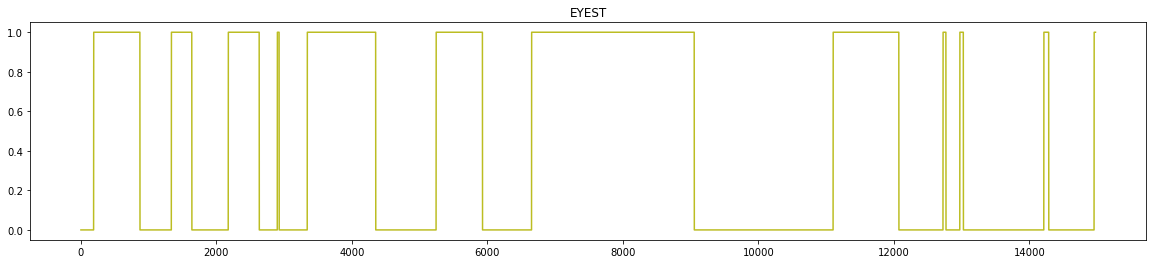

In [29]:
# Display Features
for col in df_ro.columns:
    df_ro[col].plot(figsize=(20, 4), color=next(color_cycle), title=col)
    plt.show()

In [8]:
# This function is to display two data for comparison
def compare_df(df1, df2, f, name):
    color_c = next(color_cycle)
    df1.plot(figsize=(15, 1), color=color_c, title=f'{f} before {name}')
    plt.show()
    df2.plot(figsize=(15, 1), color=color_c, title=f'{f} after {name}')
    plt.show()

In [9]:
# we choose 120 window size to reduce data fluctuations
window_size = 110

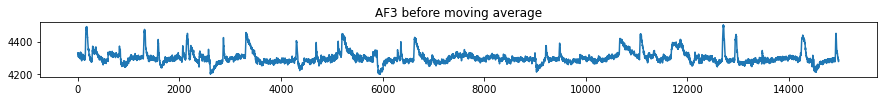

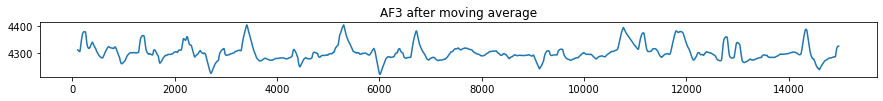

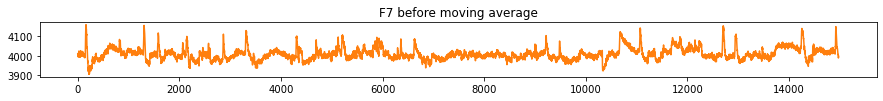

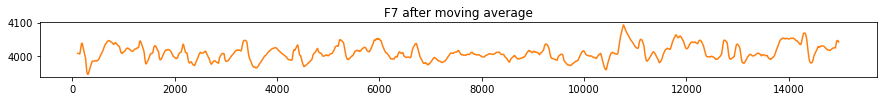

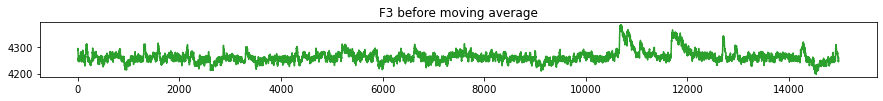

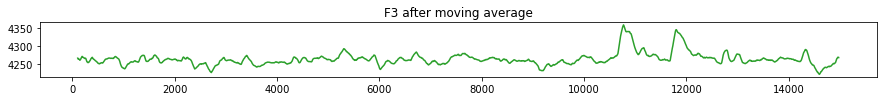

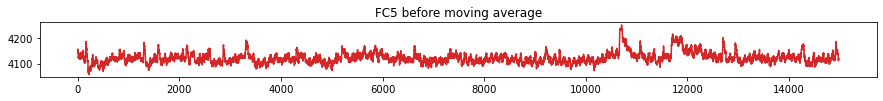

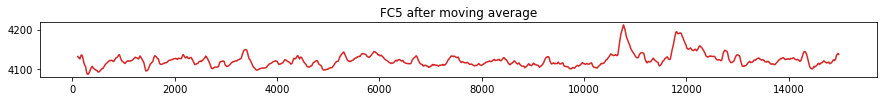

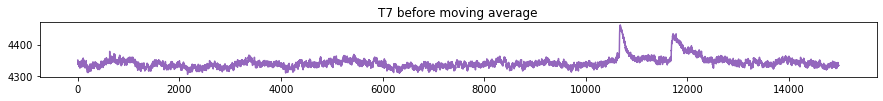

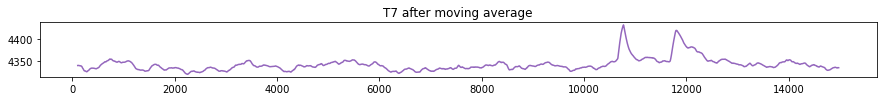

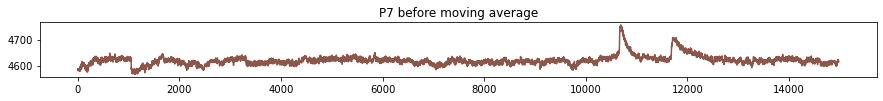

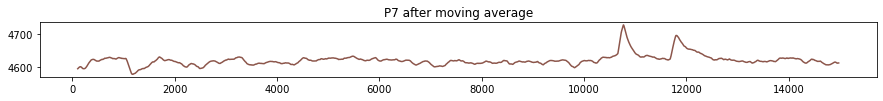

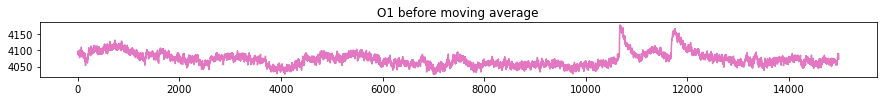

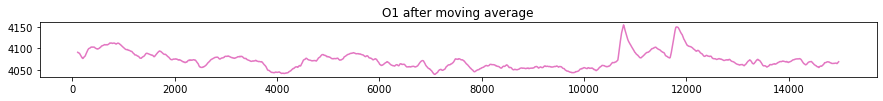

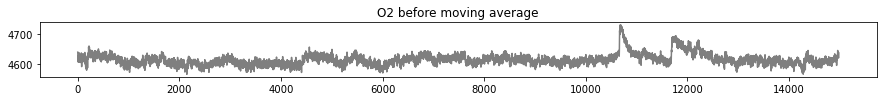

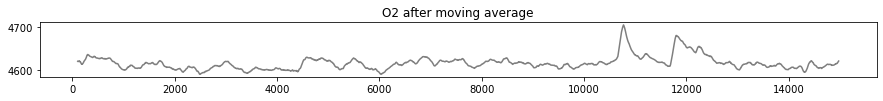

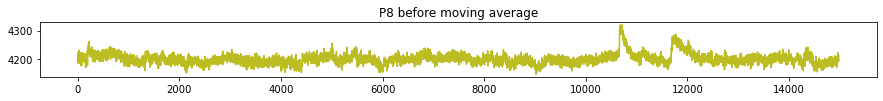

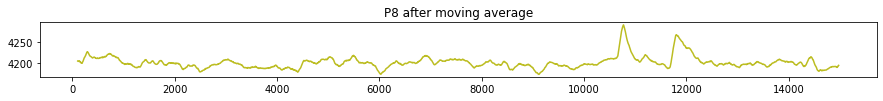

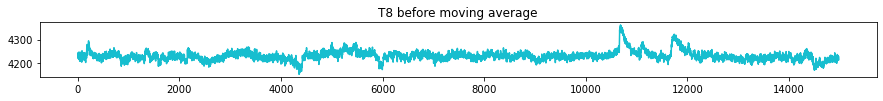

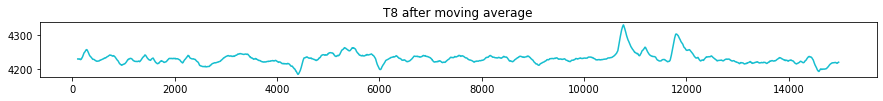

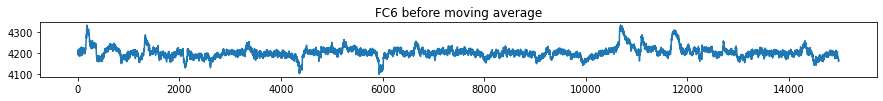

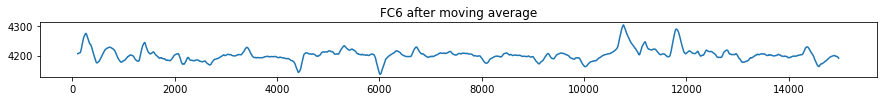

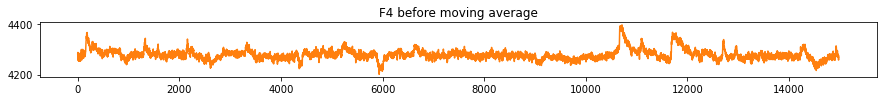

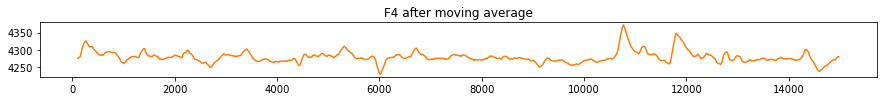

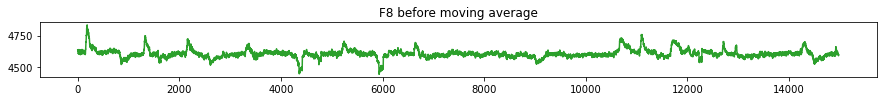

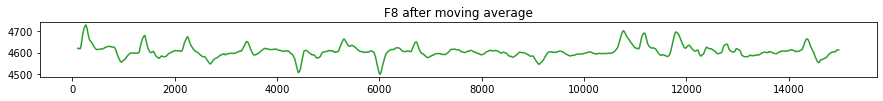

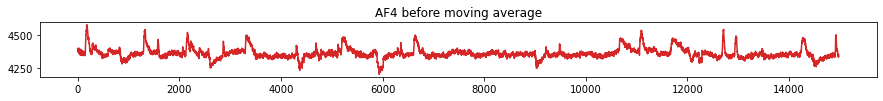

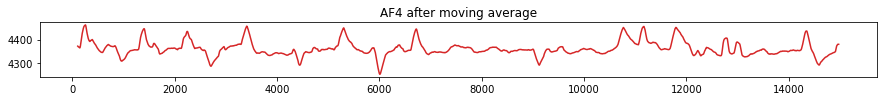

In [10]:
df_pma = df_ro.copy()
df_ma = df_ro.copy()
for f in df_ro.columns[:-1]:
    df_ma[f] = df_pma[f].rolling(window=window_size, center=False).mean()
    compare_df(df_pma[f],df_ma[f],f, 'moving average')

In [11]:
df_ma.isnull().values.any()

True

In [12]:
# drop NaN
df_ma = df_ma.dropna()
df_ma = df_ma.reset_index(drop=True)
print(df_ro.shape)
print(df_ma.shape)

(14976, 15)
(14867, 15)


In [13]:
# Split data 80% for training 20% for testing 
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_ma[df_ma.columns[:-1]], df_ma['EYEST'],
                                                        test_size=0.25,
                                                        shuffle=False
                                                       )

In [14]:
# Train data
print('X_train2 length:', len(X_train2))
print('y_train2 length:', len(y_train2))
print()
# Test/Validation data
print('X_test2 length:', len(X_test2))
print('y_test2 length:', len(y_test2))

y_train2.shape

X_train2 length: 11150
y_train2 length: 11150

X_test2 length: 3717
y_test2 length: 3717


(11150,)

In [15]:
np_x_train = X_train2.values 
np_y_train = y_train2.values
np_x_test = X_test2.values
np_y_test = y_test2.values

In [23]:
# model
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [18]:
folds = StratifiedKFold(n_splits=15)

In [24]:
print('gaussian :: ')
gaussian_values = cross_val_score(GaussianNB(), np_x_train, np_y_train, cv = folds)

gaussian :: 


In [25]:
gaussian_values

array([0.52016129, 0.36827957, 0.52016129, 0.43145161, 0.52150538,
       0.64064603, 0.30820996, 0.60161507, 0.46164199, 0.75908479,
       0.512786  , 0.512786  , 0.512786  , 0.69717362, 0.75370121])

In [26]:
gaussian_values.mean()

0.5414659884127604